<a href="https://colab.research.google.com/github/varmapriya/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

# Step 1: Read the data

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Target feature here is PE (Power Plant Energy output)
# Step 2 - Perform Basic data quality checks

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:

df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [8]:

## to find percent of duplicate value among whole data
df.duplicated().sum()/len(df)

0.004285117056856187


# Step 3: Seperate X and Y(PE)

In [9]:

X = df.drop(columns=['PE'])
Y = df[['PE']]


In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4: Create a Preprocessing Pipeline for X

In [12]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


# Step 5: Apply train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [16]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [17]:

ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [18]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [19]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [23]:
xtrain.shape[1]

4

# Step 5: Build the Keras neural network
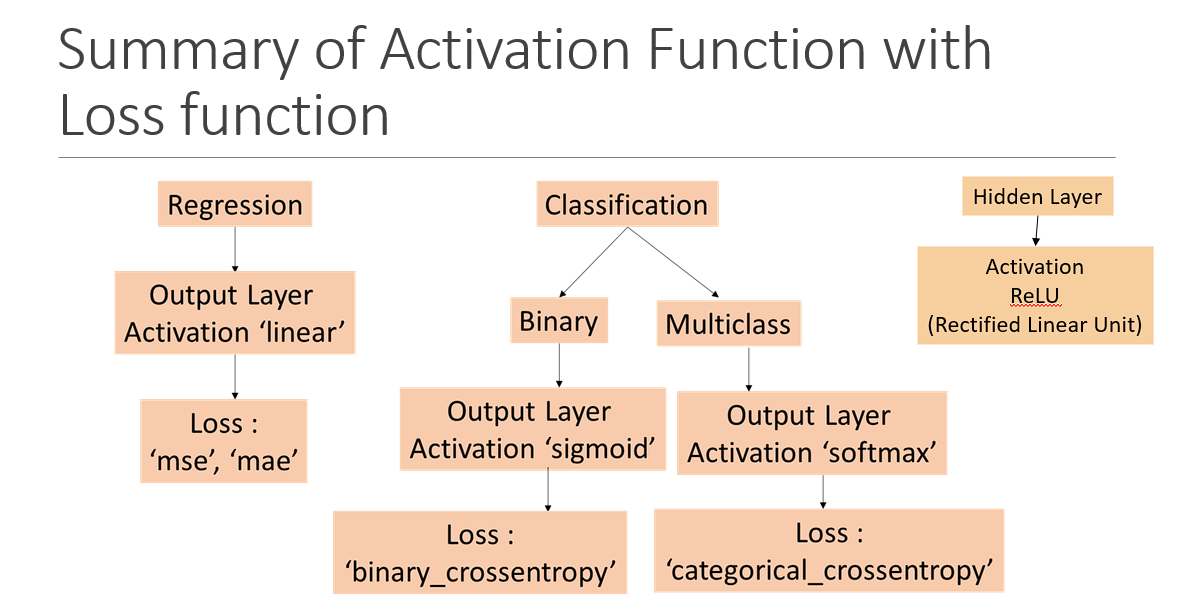

In [21]:
from keras.models import Sequential
from keras.layers import Dense , Input

In [24]:
# Initialize the Sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hideen Layer 1
model.add(Dense(units=8 , activation='relu'))
# Add the Hideen Layer 2
model.add(Dense(units=4 , activation='relu'))
# Add the Output Layer
model.add(Dense(units=1, activation='linear'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='mse' , optimizer = 'adam' , metrics = 'mae')

In [29]:
hist = model.fit(xtrain , ytrain , epochs = 100 , validation_split = 0.2)

Epoch 1/100
192/192 [==============================] - 3s 5ms/step - loss: 206767.1562 - mae: 454.3952 - val_loss: 205529.8125 - val_mae: 453.0243
Epoch 2/100
192/192 [==============================] - 1s 5ms/step - loss: 204827.3438 - mae: 452.2213 - val_loss: 201981.4531 - val_mae: 449.0197
Epoch 3/100
192/192 [==============================] - 1s 5ms/step - loss: 198667.2188 - mae: 445.1880 - val_loss: 192326.9219 - val_mae: 437.8350
Epoch 4/100
192/192 [==============================] - 1s 3ms/step - loss: 185479.9375 - mae: 429.4844 - val_loss: 174962.3750 - val_mae: 416.4816
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 164802.5469 - mae: 402.7175 - val_loss: 150661.5156 - val_mae: 383.1552
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 139320.4375 - mae: 364.8665 - val_loss: 124048.2266 - val_mae: 339.8774
Epoch 7/100
192/192 [==============================] - 1s 3ms/step - loss: 114279.9453 - mae: 319.8196 - val_loss: 100

# Evaluate the model in train and test

In [31]:
model.evaluate(xtrain,ytrain)

240/240 [==============================] - 1s 3ms/step - loss: 19.1232 - mae: 3.4405


[19.123151779174805, 3.4404690265655518]

In [32]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 3ms/step - loss: 17.5955 - mae: 3.3362


[17.595476150512695, 3.336174249649048]


# Plot the learning curve

In [36]:
hist.history['loss']

[206767.15625,
 204827.34375,
 198667.21875,
 185479.9375,
 164802.546875,
 139320.4375,
 114279.9453125,
 93835.015625,
 78587.6484375,
 66330.2109375,
 54837.51953125,
 43248.94140625,
 31873.283203125,
 21729.970703125,
 13883.6025390625,
 8786.8857421875,
 6007.30029296875,
 4549.55859375,
 3541.94384765625,
 2767.609375,
 2209.28076171875,
 1807.51513671875,
 1507.2750244140625,
 1275.4793701171875,
 1089.2515869140625,
 936.8427124023438,
 807.457275390625,
 696.1365356445312,
 599.5009155273438,
 514.6174926757812,
 439.3572692871094,
 372.7060241699219,
 314.4046630859375,
 263.4888000488281,
 220.3155517578125,
 182.44703674316406,
 150.74050903320312,
 124.28970336914062,
 102.48910522460938,
 84.70585632324219,
 70.52759552001953,
 59.371009826660156,
 50.5745964050293,
 43.968990325927734,
 38.93849182128906,
 35.176025390625,
 32.137535095214844,
 29.813596725463867,
 28.000356674194336,
 26.5289306640625,
 25.362043380737305,
 24.347370147705078,
 23.6767635345459,
 23.08

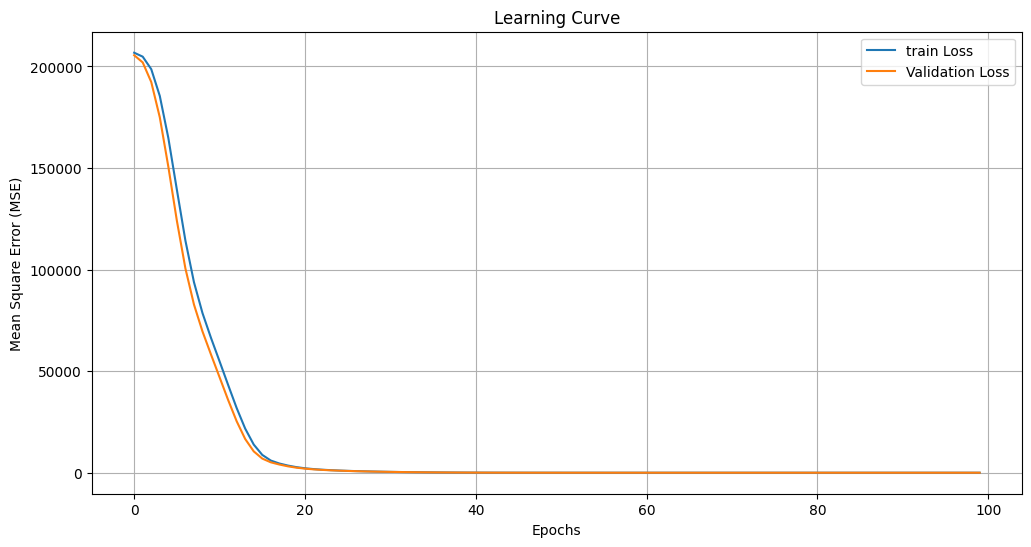

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='train Loss')
plt.plot(hist.history['val_loss'] , label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Predict the results for train and test

In [38]:


ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [39]:


ypred_train[0:5]

array([[441.4836 ],
       [435.13635],
       [432.07965],
       [431.44385],
       [433.6612 ]], dtype=float32)

In [40]:


ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [41]:

ypred_test[0:5]

array([[437.3044 ],
       [436.7773 ],
       [460.0655 ],
       [475.9326 ],
       [439.09915]], dtype=float32)

In [42]:


ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


# Perform detailed evaluation

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [44]:

def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [45]:


evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 1s 3ms/step
Mean Squared Error : 19.12
Root Mean Squared Error : 4.37
Mean Absolute Error : 3.44
R2 Score : 0.9346


In [46]:


evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 2ms/step
Mean Squared Error : 17.60
Root Mean Squared Error : 4.19
Mean Absolute Error : 3.34
R2 Score : 0.9385


# R2 score in test is 0.9385 > 0.8 hence above model is very good


# Saving above model (.keras)

In [47]:
model.save('PowerOutput.keras')

# Load the above model

In [48]:
from keras.models import load_model

In [50]:
m = load_model('/content/PowerOutput.keras')

In [52]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.22929114, -0.07064928, -0.24896686, -0.15958263,  0.18949676,
          0.2801765 , -0.42518237, -3.519316  ],
        [ 0.30250934, -0.49031785, -0.16672233,  0.05306174, -0.68601525,
         -0.0633638 ,  0.6706716 , -2.5876982 ],
        [-0.10654936, -0.15671922,  1.3803542 ,  0.02170106, -0.34287602,
          0.13946961, -0.3752141 ,  3.2803714 ],
        [-0.7757299 ,  1.1143144 , -1.0466744 , -1.1841614 , -0.6091771 ,
          0.07474626,  1.4306614 ,  2.7607906 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([ 4.5467563 ,  4.575234  ,  4.749648  ,  4.4952216 ,  4.468683  ,
        -0.37162954,  4.6403427 ,  4.518496  ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 2.9941096 , -0.06670906, -0.18881857, -1.7132531 ],
        [ 3.768173  ,  0.30023384, -0.7032848 ,  1.673116  ],
        [ 3.0561187 ,  0.1001753